## Implement PCA
Assume you have a set of n 2-D variables, implement PCA. You may use numpy.

Lets import numpy and initialize a random set of variables to trouble shoot the procedure. Let X be a set of N=100 (x,y) datapoints. To illustrate the procedure I will center them around 1 and recenter them at a second step

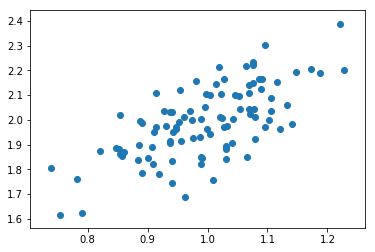

In [2]:
import numpy as np
import matplotlib.pyplot as plot
X = np.random.normal(1,0.1,size=(100,2))
X[:,1]+= X[:,0]
plot.scatter(X[:,0],X[:,1])

Now that we have some data, lets start with PCA.
### 1) Center the data

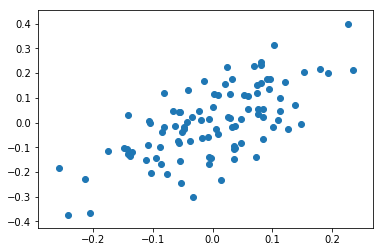

In [6]:
X[:,0] -= np.mean(X[:,0])
X[:,1] -= np.mean(X[:,1])
plot.scatter(X[:,0],X[:,1])

### 2) Get the covariance matrix and find the eigenvalues. then order the eigenvalues according to their size


In [10]:
cov = np.cov(X.T)
print('Covariance matrix: \n',cov)
eigenval, eig = np.linalg.eig(cov)
s_idx = np.argsort(eigenval)

for a in reversed(s_idx):
    print('lambda: ', eigenval[a], 'v = ',eig[a])


Covariance matrix: 
 [[0.00971486 0.00961866]
 [0.00961866 0.02096746]]
lambda:  0.02648448871709949 v =  [ 0.49754254 -0.86743958]
lambda:  0.004197823613359391 v =  [-0.86743958 -0.49754254]


### 3) Now project the recentered data points onto the eigenvalues

[[-0.86743958 -0.49754254]
 [ 0.49754254 -0.86743958]]


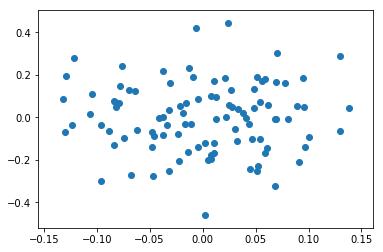

In [11]:
eigen_space = np.concatenate(([eig[0]],[eig[1]]))
print(eigen_space)
pca_d = np.dot(X,eigen_space)
#print(pca_d)
plot.scatter(pca_d[:,0],pca_d[:,1])
# for a in reversed(s_idx):
#     #print('lambda: ', eigenval[a], 'v = ',eig[a])
#     pca_d = np.dot(X.T, eig_space.T)

## Logistic regression
Assume we have a dataset X={x_1,x_2, ...,x_m }, with true labels Y = {}.

In [46]:
std_axis = 1
step_size = 0.1
X = np.random.normal(0,0.1,size = (5,5))

### Normalize and center the data

In [33]:
X-=np.mean(X, axis=std_axis)
X/=np.std(X,axis=std_axis)
print(X)

[[ 0.81458984 -0.50866583 -2.49291594  0.47107464 -0.76012043]
 [ 2.15732197 -0.46218179  1.0540433   1.44235301 -0.90231205]
 [ 0.5825967  -0.18267205 -0.99895203  1.23601039 -0.51495155]
 [ 1.0911022  -1.63996312 -0.21325547  0.38118789 -0.62394796]
 [ 1.76625571 -0.57051823 -1.7367909   1.18120595 -0.38763395]]


### Define the sigmoid and loss

In [37]:
def sigmoid(z):
    return 1/(1+np.exp(z))

def cost_function(y_true, y_pred):
    N = len(y_true)
    return -np.dot(y_true,np.log(y_pred))+np.dot(1.-y_true,np.log(1.-y_pred))/N


### Inititalize weights

In [44]:
num_feature = X.shape[0]
n_samples = X.shape[1]
W = np.random.normal(0,0.1,size = (num_feature))

In [48]:
del_grad_tot = 0.0001
del_grad = 10
prev_cost = del_grad
while del_grad > del_grad_tot:
    Z = np.dot(W,X)
    y_pred = sigmoid(Z)
    curr_cost = (y_true, y_pred)
    W-=n_samples/step_size*np.dot(X.T,y_pred-y_true)
    del_grad = np.abs(prev_cost-curr_cost)
    prev_cost = curr_cost

NameError: name 'y_true' is not defined